# Introduction to Hyperspectral Imagery and Image Analysis

### By Alina Zare<sup>1</sup>, Taylor Glenn<sup>2</sup> and Susan Meerdink<sup>1</sup>

<sup>1</sup>The Machine Learning and Sensing Lab, Electrical and Computer Engineering, University of Florida, Gainesville, FL 32611
<url>https://faculty.eng.ufl.edu/machine-learning/</url>

<sup>2</sup>Precision Silver, LLC,  Gainesville, FL 32601  
<url>http://www.precisionsilver.com</url>


**What is a Hyperspectral Image?**  

* Hyperspectral data measures hundreds of wavelengths of the electromagnetic spectrum (generally 350 nm to 2500 nm, but depends on sensor). 
<img src="Picture01.png" alt="Electromagnetic Spectrum" style="width: 600px;"/>

* An image from a hyperspectral sensor results in a hyperspectral data cube with two spatial and one spectral dimension (latitude x longitude x number of spectral bands). A spectral band measures a specific wavelength of the electromagnetic spectrum.

<img src="Picture02.png" alt="Hyperspectral Data Cube" style="width: 600px;"/>

* Each pixel (latitude x longitude) in the hyperspectral data cube has a spectrum. This spectrum is the result of energy traveling from the sun, through the atmosphere, interacting with the earth's surface, and being reflected back up through the atmosphere to be measured by the sensor. 

<img src="Picture03.png" alt="Hyperspectral Image Reflectance" style="width: 500px;"/>

* As mentioned above, a pixel's spectrum is the results of energies interaction with the earth's surface. Depending on the material, the amount of energy reflected back will differ across the electromagnetic spectrum. These differences allow us to discriminate between materials in an image. 
<img src="Picture04.png" alt="Hyperspectral Spectra Examples" style="width: 500px;"/>




In [1]:
# imports and setup
import numpy as np
import os.path
import scipy.io
from loadmat import loadmat

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2 # run this to make figures larger, often have to execute block multiple times for it to take

The data we will be working with is the 'MUUFL Gulfport Dataset.'  This data set is a hyperspectral image cube and a co-registered LiDAR point cloud collected over the University of Mississippi - Gulfpark campus.  The data has class/ground cover labels as well as several super- and sub-pixel targets placed throughout the scene.  

This data can be obtained here: <url>https://github.com/GatorSense/MUUFLGulfport</url>

DOI/Reference for the data set: 
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.1186326.svg)](https://doi.org/10.5281/zenodo.1186326)

Citation for Technical Report describing the data: P. Gader, A. Zare, R. Close, J. Aitken, G. Tuell, “MUUFL Gulfport Hyperspectral and LiDAR Airborne Data Set,” University of Florida, Gainesville, FL, Tech. Rep. REP-2013-570, Oct. 2013.

In [2]:
# load gulfport campus image
img_fname = 'muufl_gulfport_campus_w_lidar_1.mat'
spectra_fname = 'tgt_img_spectra.mat'

dataset = loadmat(img_fname)['hsi']

hsi = dataset['Data']

In [3]:
# check out the shape of the data
n_r,n_c,n_b = hsi.shape
hsi.shape

(325, 337, 72)

In [4]:
# pull a 'random' pixel/spectrum
# Exercise:  Change the rr and cc values to print different pixels/spectra around the image and plot the spectra (next two cells)
rr,cc = 150,150
spectrum = hsi[rr,cc,:]
spectrum

array([-0.06725017,  0.03278839, -0.00279198,  0.03807665,  0.06110134,
        0.0911178 ,  0.11102644,  0.14980921,  0.15717024,  0.15044577,
        0.12951583,  0.11845177,  0.098447  ,  0.08152854,  0.07269552,
        0.05546356,  0.0577646 ,  0.05003632,  0.04896291,  0.05072632,
        0.04709113,  0.04778027,  0.04621802,  0.04937963,  0.05496205,
        0.05768839,  0.05474102,  0.05659265,  0.06270672,  0.06293564,
        0.06578992,  0.07391708,  0.08597424,  0.10310426,  0.14290506,
        0.18296854,  0.24907093,  0.30135405,  0.3652786 ,  0.40965956,
        0.4400047 ,  0.43319905,  0.48508838,  0.48521036,  0.4939586 ,
        0.50098294,  0.50358766,  0.5023122 ,  0.51912034,  0.523914  ,
        0.5207378 ,  0.53839076,  0.52664465,  0.5332444 ,  0.53505063,
        0.5277779 ,  0.51945   ,  0.5283947 ,  0.5274837 ,  0.5025528 ,
        0.5227472 ,  0.5443434 ,  0.52623516,  0.5159256 ,  0.54742396,
        0.52525336,  0.5316818 ,  0.5334816 ,  0.4905362 ,  0.51

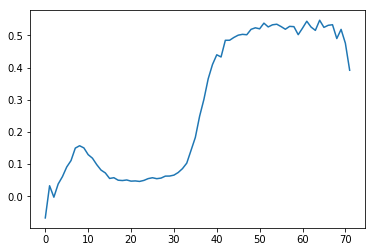

In [5]:
# plot a spectrum
plt.plot(spectrum)

Text(0.5, 1.0, 'Spectrum from Pixel 150,150')

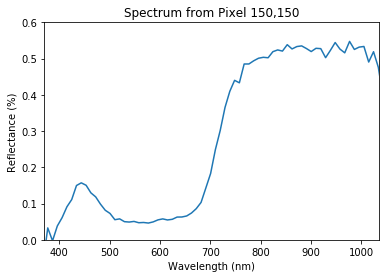

In [24]:
# That last plot would make your advisor sad.
# Label your AXES!
wavelengths = dataset['info']['wavelength']

plt.plot(wavelengths,spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.ylim([0, 0.6])
plt.xlim([370, 1035])
plt.title(('Spectrum from Pixel ' + str(rr)+ ','+str(cc)))

Text(0.5, 1.0, 'A single band of Hyperspectral Image in False Color')

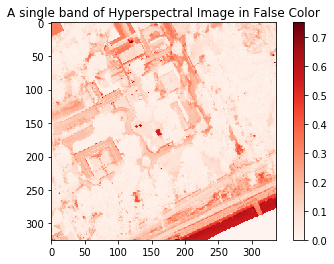

In [7]:
# plot an image of an individual band
# Exercise: Change the band number in line below to view different bands of the HSI image
plt.imshow(hsi[:,:,30],vmin=0,vmax=.75,cmap='Reds')
plt.colorbar()
plt.title('A single band of Hyperspectral Image in False Color')

In [8]:
# find the band numbers for approximate Red,Green,Blue (RGB) wavelengths
wavelengths[9],wavelengths[20],wavelengths[30]

(453.5, 558.099976, 653.299988)

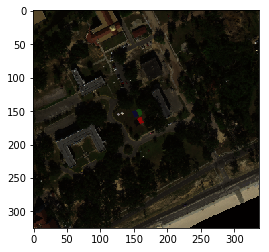

In [9]:
# make a psuedo-RGB image from appropriate bands
psuedo_rgb = hsi[:,:,(30,20,9)]
psuedo_rgb = np.clip(psuedo_rgb,0,1.0) 
plt.imshow(psuedo_rgb)

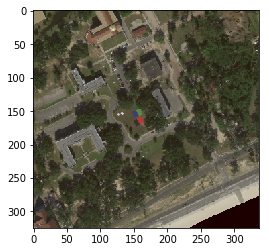

In [10]:
# Thats too dark. Add some gamma correction
plt.imshow(psuedo_rgb**(1/2.2)) 

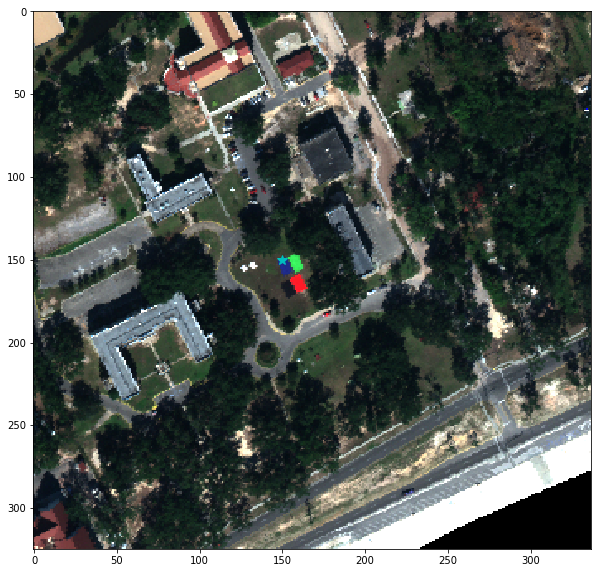

In [15]:
# compare to the provided RGB image (made with better band selection/weighting)
plt.figure(figsize=(10,10))
plt.imshow(dataset['RGB'])
plt.plot(rr,cc,'c*',markersize=10) #label our selected pixel location from the plot above

**What type of analysis can be done with a hyperspectral image?**

Common hyperspectral image analysis techniques include:

  * **Hyperspectral unmixing**:  The goal of hyperspectral unmixing is to decompose an image cube into the *pure* spectral signatures found in a scene (called **endmembers**) and the amount (or **proportion**) of each endmember found in each pixel. This is *sub-pixel* analysis since we are determining sub-pixel amounts of each material in each pixel. *Overview papers on hyperspectral unmixing:*

    * J. M. Bioucas-Dias, A. Plaza, N. Dobigeon, M. Parente, Q. Du, P. Gader, J. Chanussot, "Hyperspectral Unmixing Overview: Geometrical, Statistical, and Sparse Regression-Based Approaches," in IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, vol. 5, no. 2, pp. 354-379, April 2012.
doi: 10.1109/JSTARS.2012.2194696. <url>http://ieeexplore.ieee.org/document/6200362/</url>  
    * N. Keshava and J. F. Mustard, "Spectral unmixing," in IEEE Signal Processing Magazine, vol. 19, no. 1, pp. 44-57, Jan 2002. doi: 10.1109/79.974727. <url>http://ieeexplore.ieee.org/document/974727/</url> 


  * **Sub-pixel target detection**: Detection of a (sub-pixel sized) target within a hyperspectral scene.  *Overview papers on hyperspectral target detection*:

    * D. Manolakis and G. Shaw, "Detection algorithms for hyperspectral imaging applications," in IEEE Signal Processing Magazine, vol. 19, no. 1, pp. 29-43, Jan 2002. doi: 10.1109/79.974724. <url>http://ieeexplore.ieee.org/document/974724/</url>  
    * T. Glenn, "Context-dependent Detection in Hyperspectral Imagery," Ph.D. Thesis, University of Florida, 2013.<url> http://ufdc.ufl.edu/UFE0046170/00001/pdf?search=context-dependent </url>


  * **Classification**: Classification of each pixel (or portion of a pixel) into one of several categories or classes of interest. *Some hyperspectral classification approaches*:
    * F. Melgani and L. Bruzzone, "Classification of hyperspectral remote sensing images with support vector machines," in IEEE Transactions on Geoscience and Remote Sensing, vol. 42, no. 8, pp. 1778-1790, Aug. 2004. <url>http://ieeexplore.ieee.org/document/1323134/</url>
    * G. Camps-Valls, D. Tuia, L. Bruzzone and J. A. Benediktsson, "Advances in Hyperspectral Image Classification: Earth Monitoring with Statistical Learning Methods," in IEEE Signal Processing Magazine, vol. 31, no. 1, pp. 45-54, Jan. 2014. <url>http://ieeexplore.ieee.org/abstract/document/6678612/</url>
